# Project 2 COFFEE CHAIN 

###Project Introduction
1.The data presented here was collected over a two years period of 2010 and 2011 in United States.
2.Data Characteristics:
......
3.Firm’s primary objective is to maximize profits.By using this data, I will try to find out any information which can helps company adjust their strategy and make the company better off.
  1.Product portfolio
      Compare budget data with actual data, find out probelems.For exaple,investigate which kind of product are making the most profit and is there any profit loss product.More specifically,which area is profit loss.......(write more later)
  2.Company strategies

---

### Basic package imports
---

In [73]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [74]:
### The coffee chain excel files contain three sheets
### Sheet1:fact table data; 
### Sheet2:location
### Sheet3:Product description.

## 1. Load the data from file

---
###Load the dataset "Sample_CoffeeChain.xls" 

In [16]:
### First of all,load 3 sheets
xls = pd.ExcelFile('/Users/ChrisH/Desktop/ECON628-01-chrishy2ma/projects/project_2/Sample_CoffeeChain.xls')
Fact= xls.parse('FactTable')
Location= xls.parse('Location')
Product= xls.parse('Product')

## 2. Do an initial overview of the data

---

In [23]:
###read sheet 1 
Fact

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,Date
0,94,130,219,89,36,24,777,100,90,130,220,719,1,01/01/2010 00:00:00
1,68,107,190,83,39,27,623,80,80,110,190,970,2,01/01/2010 00:00:00
2,101,139,234,95,38,26,821,110,100,140,240,970,3,01/01/2010 00:00:00
3,30,56,100,44,26,14,623,30,30,50,80,303,13,01/01/2010 00:00:00
4,54,80,134,54,26,15,456,70,60,90,150,303,5,01/01/2010 00:00:00
5,53,108,180,72,55,23,558,80,80,130,210,720,6,01/01/2010 00:00:00
6,99,171,341,170,72,47,1091,110,140,160,300,970,8,01/01/2010 00:00:00
7,0,87,150,63,87,57,435,20,50,80,130,719,9,01/01/2010 00:00:00
8,33,80,140,60,47,19,336,40,50,70,120,970,10,01/01/2010 00:00:00
9,17,72,130,58,55,22,338,20,40,70,110,719,11,01/01/2010 00:00:00


In [24]:
Fact.shape

(4248, 14)

In [25]:
Fact.head(5)

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,Date
0,94,130,219,89,36,24,777,100,90,130,220,719,1,01/01/2010 00:00:00
1,68,107,190,83,39,27,623,80,80,110,190,970,2,01/01/2010 00:00:00
2,101,139,234,95,38,26,821,110,100,140,240,970,3,01/01/2010 00:00:00
3,30,56,100,44,26,14,623,30,30,50,80,303,13,01/01/2010 00:00:00
4,54,80,134,54,26,15,456,70,60,90,150,303,5,01/01/2010 00:00:00


In [26]:
Fact.tail(5)

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,Date
4243,19,32,60,24,19,7,567,20,20,30,50,206,4,01/12/2011 00:00:00
4244,34,80,155,65,57,24,403,30,60,80,140,509,5,01/12/2011 00:00:00
4245,76,96,188,80,45,24,1079,60,70,100,170,360,6,01/12/2011 00:00:00
4246,86,104,188,72,46,23,461,80,80,120,200,360,2,01/12/2011 00:00:00
4247,30,145,266,105,125,95,716,50,120,170,290,206,3,01/12/2011 00:00:00


In [42]:
### Convert the Date column to 'datatime' datatype.
## STEP2: sort the datetime
Fact['Date']=pd.to_datetime(Fact['Date'])
Fact=Fact.sort('Date')
Fact

/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,Date
0,94,130,219,89,36,24,777,100,90,130,220,719,1,2010-01-01
113,28,48,80,32,20,8,821,50,40,60,100,580,3,2010-01-01
114,95,130,219,89,35,24,777,90,70,110,180,325,5,2010-01-01
115,54,80,134,54,26,15,456,60,40,70,110,956,6,2010-01-01
116,33,80,140,60,47,19,336,50,50,80,130,281,8,2010-01-01
117,42,83,140,57,41,18,364,50,50,80,130,254,9,2010-01-01
118,53,108,180,72,55,23,558,50,60,90,150,830,4,2010-01-01
119,159,245,452,207,86,64,965,220,260,300,560,409,2,2010-01-01
120,68,107,190,83,39,27,623,100,100,130,230,325,3,2010-01-01
112,29,56,100,44,27,14,623,50,50,70,120,580,2,2010-01-01


In [44]:
### Reset the index
Fact=Fact.reset_index(drop=True)
Fact.head(5)

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,Date
0,94,130,219,89,36,24,777,100,90,130,220,719,1,2010-01-01
1,28,48,80,32,20,8,821,50,40,60,100,580,3,2010-01-01
2,95,130,219,89,35,24,777,90,70,110,180,325,5,2010-01-01
3,54,80,134,54,26,15,456,60,40,70,110,956,6,2010-01-01
4,33,80,140,60,47,19,336,50,50,80,130,281,8,2010-01-01


In [45]:
Fact.describe().T

,count,mean,std,min,25%,50%,75%,max
Profit,4248.0,61.097693,101.708546,-638.0,17.00,40.0,92.0,778.0
Margin,4248.0,104.293315,94.342522,-302.0,52.75,76.0,132.0,613.0
Sales,4248.0,192.987524,151.133127,17.0,100.00,138.0,230.0,912.0
COGS,4248.0,84.433145,67.249769,0.0,43.00,60.0,100.0,364.0
Total Expenses,4248.0,54.063559,32.352598,10.0,33.00,46.0,65.0,190.0
Marketing,4248.0,31.185028,27.023264,0.0,13.00,22.0,39.0,156.0
Inventory,4248.0,749.381356,661.031896,-3534.0,432.00,619.0,910.5,8252.0
Budget Profit,4248.0,60.913371,79.546123,-320.0,20.00,40.0,80.0,560.0
Budget COGS,4248.0,74.830508,66.238145,0.0,30.00,50.0,90.0,450.0
Budget Margin,4248.0,100.819209,92.602725,-210.0,50.00,70.0,130.0,690.0


In [46]:
Fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 14 columns):
Profit            4248 non-null int64
Margin            4248 non-null int64
Sales             4248 non-null int64
COGS              4248 non-null int64
Total Expenses    4248 non-null int64
Marketing         4248 non-null int64
Inventory         4248 non-null int64
Budget Profit     4248 non-null int64
Budget COGS       4248 non-null int64
Budget Margin     4248 non-null int64
Budget Sales      4248 non-null int64
Area Code         4248 non-null int64
ProductId         4248 non-null int64
Date              4248 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(13)
memory usage: 464.7 KB


In [47]:
Fact.isnull().sum()

Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
Area Code         0
ProductId         0
Date              0
dtype: int64

In [48]:
###read sheet 2

In [49]:
Location

,Area Code,State,Market,Market Size
0,203,Connecticut,East,Small Market
1,206,Washington,West,Small Market
2,209,California,West,Major Market
3,210,Texas,South,Major Market
4,212,New York,East,Major Market
5,213,California,West,Major Market
6,214,Texas,South,Major Market
7,216,Ohio,Central,Major Market
8,217,Illinois,Central,Major Market
9,224,Illinois,Central,Major Market


In [50]:
Location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
Area Code      156 non-null int64
State          156 non-null object
Market         156 non-null object
Market Size    156 non-null object
dtypes: int64(1), object(3)
memory usage: 4.9+ KB


In [51]:
### read sheet 3

In [52]:
Product

,Product Type,Product,ProductId,Type
0,Coffee,Amaretto,1,Regular
1,Coffee,Columbian,2,Regular
2,Coffee,Decaf Irish Cream,3,Decaf
3,Espresso,Caffe Latte,4,Regular
4,Espresso,Caffe Mocha,5,Regular
5,Espresso,Decaf Espresso,6,Decaf
6,Espresso,Regular Espresso,7,Regular
7,Herbal Tea,Chamomile,8,Decaf
8,Herbal Tea,Lemon,9,Decaf
9,Herbal Tea,Mint,10,Decaf


In [53]:
Product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
Product Type    13 non-null object
Product         13 non-null object
ProductId       13 non-null int64
Type            13 non-null object
dtypes: int64(1), object(3)
memory usage: 488.0+ bytes


In [64]:
### After the first glance of three sheets,we can see this data has three dimensions: time, product, and location.
### Now merging three sheets into one and do the futher anaysis
### P.S.: learning code from http://pandas.pydata.org/pandas-docs/stable/merging.html
coffee_chain_1=pd.merge(Fact,Location, on='Area Code')
coffee_chain_1

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,Date,State,Market,Market Size
0,94,130,219,89,36,24,777,100,90,130,220,719,1,2010-01-01,Colorado,Central,Major Market
1,0,87,150,63,87,57,435,20,50,80,130,719,9,2010-01-01,Colorado,Central,Major Market
2,17,72,130,58,55,22,338,20,40,70,110,719,11,2010-01-01,Colorado,Central,Major Market
3,99,137,232,95,38,26,809,110,100,140,240,719,3,2010-01-02,Colorado,Central,Major Market
4,18,73,132,59,55,22,331,10,50,60,110,719,11,2010-01-02,Colorado,Central,Major Market
5,84,117,198,81,33,22,441,110,90,140,230,719,5,2010-01-03,Colorado,Central,Major Market
6,94,163,325,162,69,45,1059,100,130,150,280,719,8,2010-01-03,Colorado,Central,Major Market
7,34,75,138,63,41,19,965,40,50,70,120,719,12,2010-01-04,Colorado,Central,Major Market
8,48,102,170,68,54,22,559,80,70,130,200,719,6,2010-01-04,Colorado,Central,Major Market
9,-4,73,125,52,77,47,433,20,40,70,110,719,9,2010-01-04,Colorado,Central,Major Market


In [68]:
coffee_chain=pd.merge(coffee_chain_1,Product, on='ProductId')
coffee_chain

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,Date,State,Market,Market Size,Product Type,Product,Type
0,94,130,219,89,36,24,777,100,90,130,220,719,1,2010-01-01,Colorado,Central,Major Market,Coffee,Amaretto,Regular
1,121,163,276,113,42,31,897,130,110,170,280,719,1,2010-01-06,Colorado,Central,Major Market,Coffee,Amaretto,Regular
2,134,179,302,123,45,34,959,130,120,170,290,719,1,2010-01-12,Colorado,Central,Major Market,Coffee,Amaretto,Regular
3,146,130,245,89,38,24,777,100,90,130,220,719,1,2011-01-01,Colorado,Central,Major Market,Coffee,Amaretto,Regular
4,167,163,274,113,39,31,897,130,110,170,280,719,1,2011-01-06,Colorado,Central,Major Market,Coffee,Amaretto,Regular
5,197,179,322,123,46,34,915,160,120,180,300,719,1,2011-01-10,Colorado,Central,Major Market,Coffee,Amaretto,Regular
6,190,172,309,118,44,33,930,130,110,170,280,719,1,2011-01-11,Colorado,Central,Major Market,Coffee,Amaretto,Regular
7,46,90,165,75,44,23,956,70,90,110,200,435,1,2010-01-02,Utah,West,Small Market,Coffee,Amaretto,Regular
8,45,89,163,74,44,22,949,70,90,110,200,435,1,2010-01-03,Utah,West,Small Market,Coffee,Amaretto,Regular
9,47,91,167,76,44,23,965,70,90,110,200,435,1,2010-01-04,Utah,West,Small Market,Coffee,Amaretto,Regular


In [69]:
coffee_chain.isnull().sum()

Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
Area Code         0
ProductId         0
Date              0
State             0
Market            0
Market Size       0
Product Type      0
Product           0
Type              0
dtype: int64

In [72]:
coffee_chain.describe().T

,count,mean,std,min,25%,50%,75%,max
Profit,4248.0,61.097693,101.708546,-638.0,17.00,40.0,92.0,778.0
Margin,4248.0,104.293315,94.342522,-302.0,52.75,76.0,132.0,613.0
Sales,4248.0,192.987524,151.133127,17.0,100.00,138.0,230.0,912.0
COGS,4248.0,84.433145,67.249769,0.0,43.00,60.0,100.0,364.0
Total Expenses,4248.0,54.063559,32.352598,10.0,33.00,46.0,65.0,190.0
Marketing,4248.0,31.185028,27.023264,0.0,13.00,22.0,39.0,156.0
Inventory,4248.0,749.381356,661.031896,-3534.0,432.00,619.0,910.5,8252.0
Budget Profit,4248.0,60.913371,79.546123,-320.0,20.00,40.0,80.0,560.0
Budget COGS,4248.0,74.830508,66.238145,0.0,30.00,50.0,90.0,450.0
Budget Margin,4248.0,100.819209,92.602725,-210.0,50.00,70.0,130.0,690.0


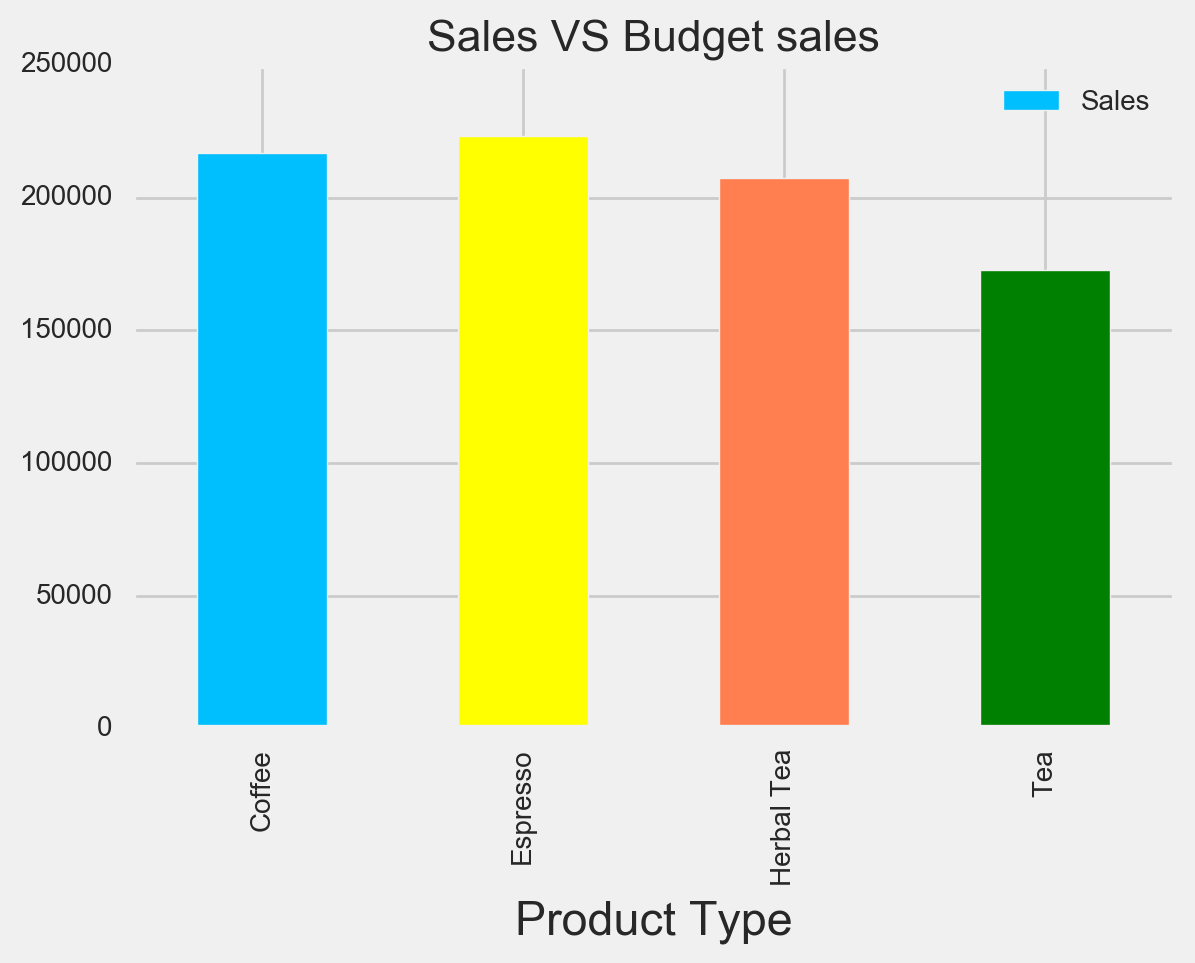

In [86]:
coffee_chain.groupby( ['Product Type'] )[ ['Sales'] ].sum().plot(kind="bar",
                                                                           color=['deepskyblue', 'yellow','coral','green']
                                                                         )
plt.title('Sales VS Budget sales', fontsize=16)
plt.show()

In [ ]:
### Top sale is Espresso,and worse sale is tea. We can resprate product type Coffees bean and Teas,and drip details.


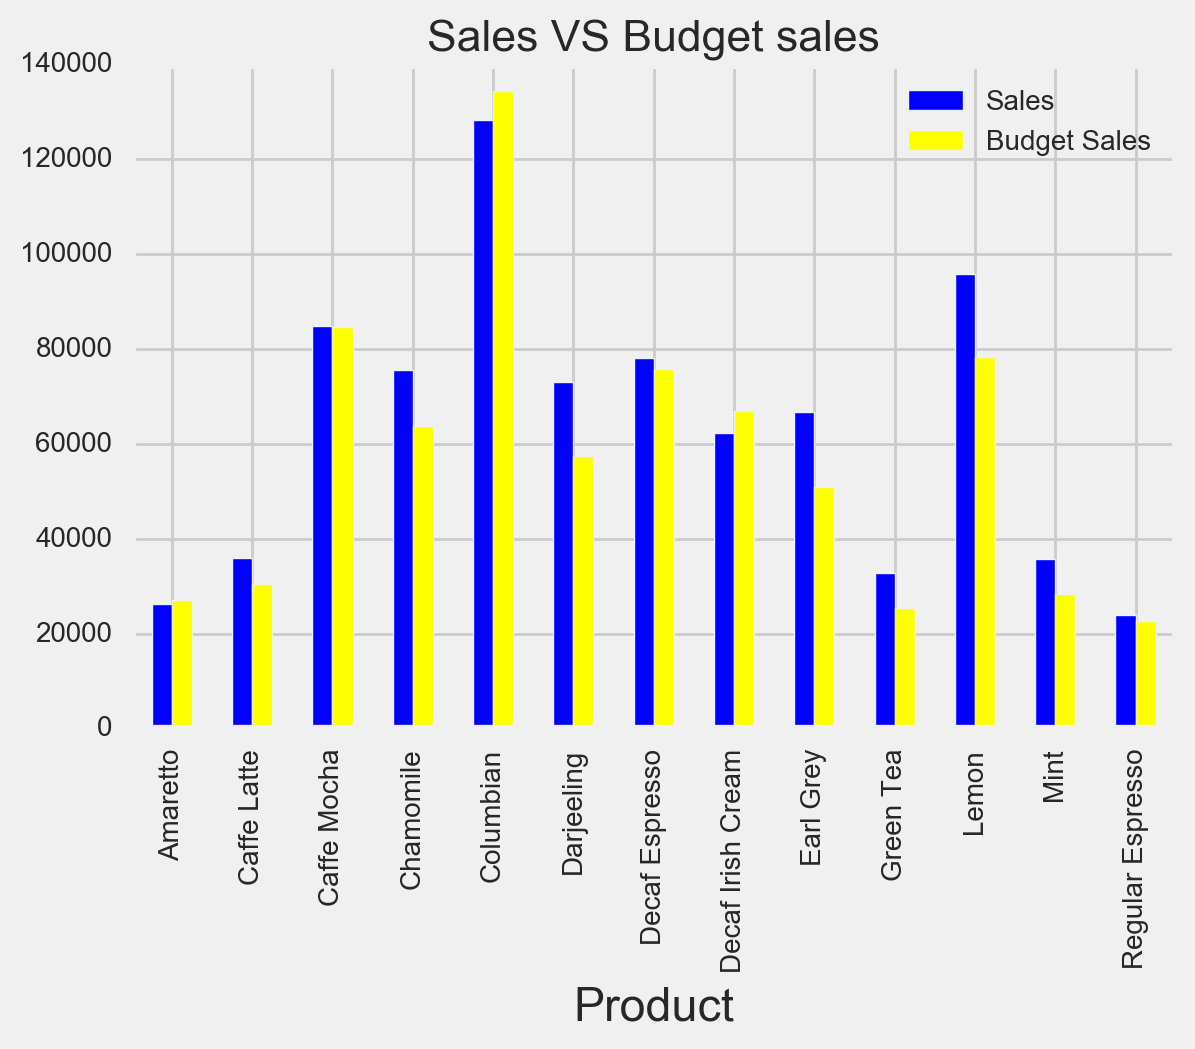

In [87]:
coffee_chain.groupby( ['Product'] )[ ['Sales','Budget Sales'] ].sum().plot(kind="bar",
                                                                           color=['blue', 'yellow']
                                                                         )
plt.title('Sales VS Budget sales', fontsize=16)
plt.show()

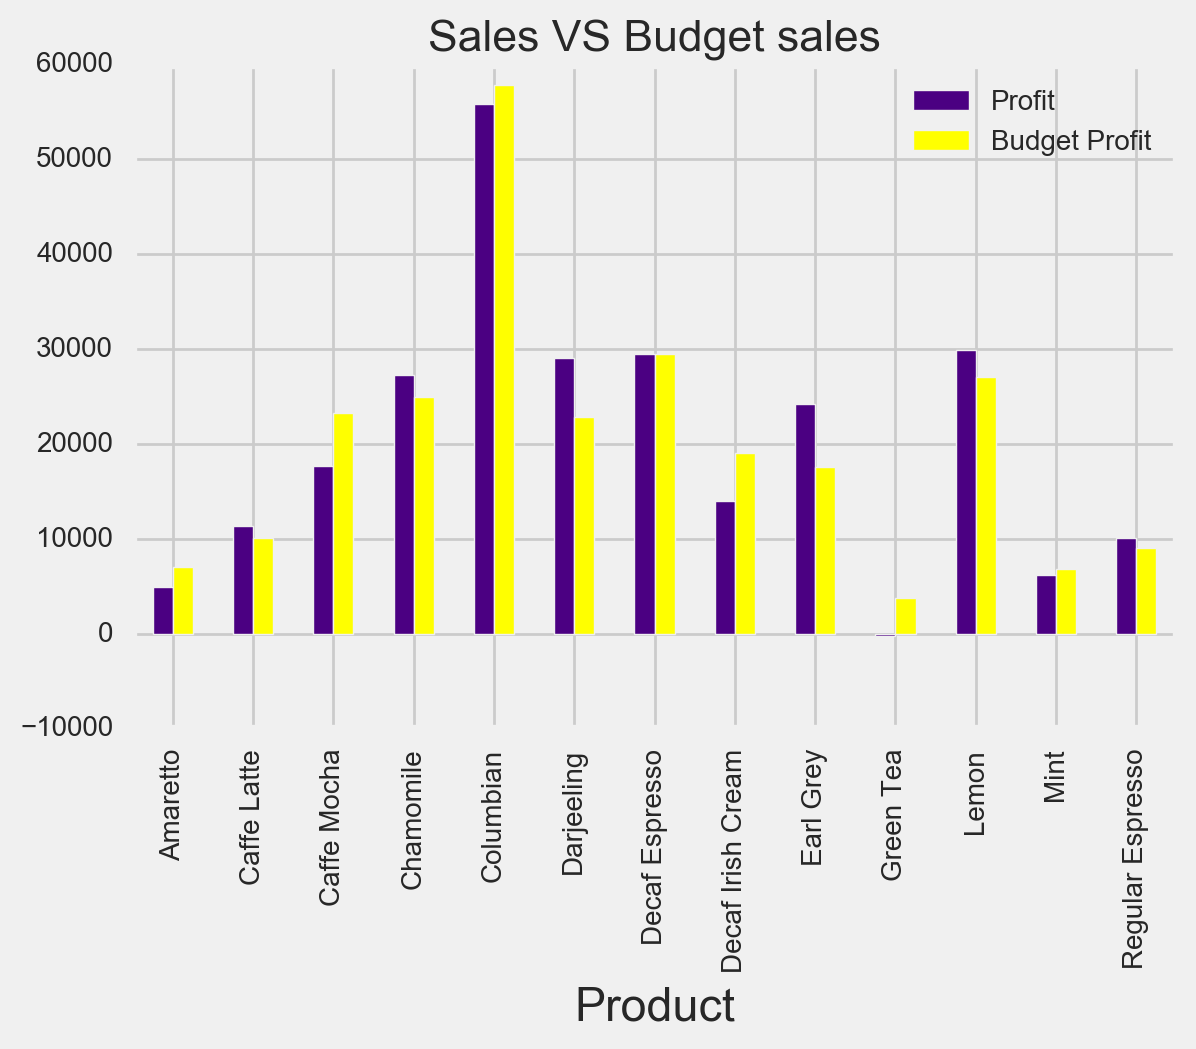

In [88]:
coffee_chain.groupby( ['Product'] )[ ['Profit','Budget Profit'] ].sum().plot(kind="bar",
                                                                           color=['indigo', 'yellow']
                                                                         )
plt.title('Sales VS Budget sales', fontsize=16)
plt.show()

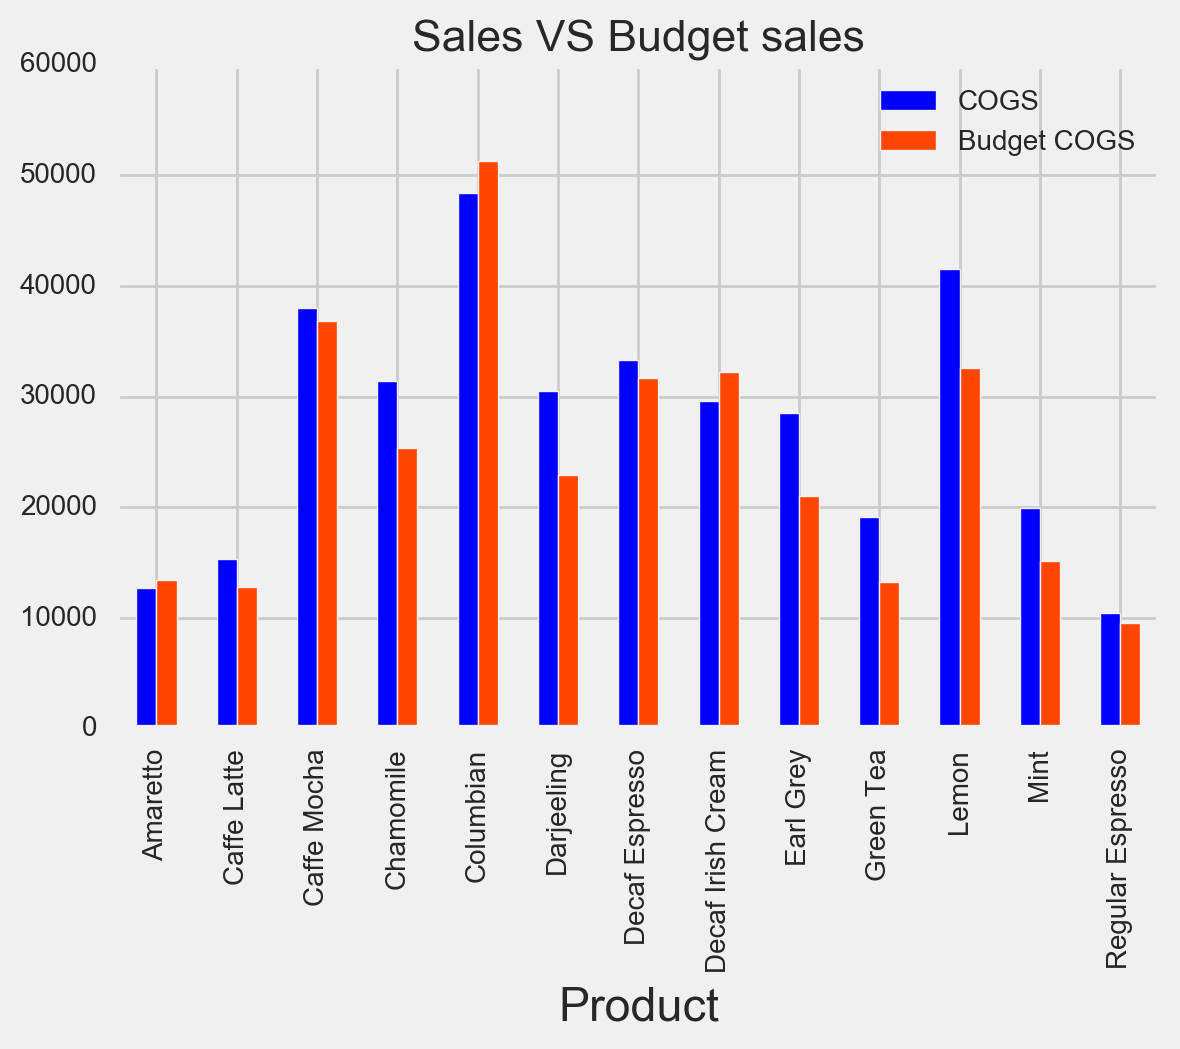

In [89]:
coffee_chain.groupby( ['Product'] )[ ['COGS','Budget COGS'] ].sum().plot(kind="bar",
                                                                           color=['blue', 'orangered']
                                                                         )
plt.title('Sales VS Budget sales', fontsize=16)
plt.show()